In [0]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
%matplotlib inline
import matplotlib.pyplot as plt

In [0]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

In [0]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

In [0]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## Architecture 1 with 2 Convolution Layers 4x4 Kernal

In [0]:
model = Sequential()
model.add(Conv2D(32, (4, 4), padding="same", activation="relu",input_shape=input_shape))
model.add(Conv2D(64, (4, 4), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 291s 5ms/step - loss: 0.1436 - acc: 0.9575 - val_loss: 0.0429 - val_acc: 0.9854
Epoch 2/12
60000/60000 [==============================] - 290s 5ms/step - loss: 0.0411 - acc: 0.9876 - val_loss: 0.0316 - val_acc: 0.9885
Epoch 3/12
60000/60000 [==============================] - 290s 5ms/step - loss: 0.0256 - acc: 0.9914 - val_loss: 0.0340 - val_acc: 0.9881
Epoch 4/12
60000/60000 [==============================] - 289s 5ms/step - loss: 0.0169 - acc: 0.9946 - val_loss: 0.0297 - val_acc: 0.9897
Epoch 5/12
60000/60000 [==============================] - 289s 5ms/step - loss: 0.0126 - acc: 0.9956 - val_loss: 0.0323 - val_acc: 0.9896
Epoch 6/12
60000/60000 [==============================] - 287s 5ms/step - loss: 0.0099 - acc: 0.9968 - val_loss: 0.0318 - val_acc: 0.9911
Epoch 7/12
60000/60000 [==============================] - 287s 5ms/step - loss: 0.0081 - acc: 0.9973 - val_loss: 0.0471 - 

Test loss: 0.04097821550033655
Test accuracy: 0.9913


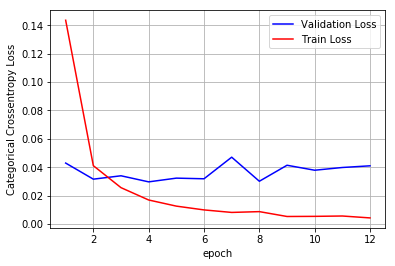

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## Architecture 1 with 2 Convolution Layers 4x4 Kernal + Dropouts in Dense Layer

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 291s 5ms/step - loss: 0.2170 - acc: 0.9336 - val_loss: 0.0461 - val_acc: 0.9841
Epoch 2/12
60000/60000 [==============================] - 293s 5ms/step - loss: 0.0776 - acc: 0.9770 - val_loss: 0.0373 - val_acc: 0.9873
Epoch 3/12
60000/60000 [==============================] - 285s 5ms/step - loss: 0.0550 - acc: 0.9832 - val_loss: 0.0339 - val_acc: 0.9889
Epoch 4/12
60000/60000 [==============================] - 274s 5ms/step - loss: 0.0428 - acc: 0.9869 - val_loss: 0.0302 - val_acc: 0.9908
Epoch 5/12
60000/60000 [==============================] - 268s 4ms/step - loss: 0.0365 - acc: 0.9883 - val_loss: 0.0312 - val_acc: 0.9913
Epoch 6/12
60000/60000 [==============================] - 281s 5ms/step - loss: 0.0302 - acc: 0.9903 - val_loss: 0.0280 - val_acc: 0.9920
Epoch 7

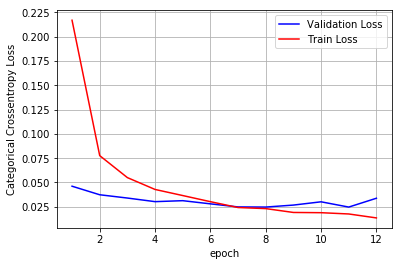

In [0]:
model = Sequential()
model.add(Conv2D(32, (4, 4), padding="same", activation="relu",input_shape=input_shape))
model.add(Conv2D(64, (4, 4), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## Architecture 1 with 2 Convolution Layers 4x4 Kernal + Dropout + Batch Normalization in Dense Layer

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 291s 5ms/step - loss: 0.1303 - acc: 0.9618 - val_loss: 0.0458 - val_acc: 0.9848
Epoch 2/12
60000/60000 [==============================] - 281s 5ms/step - loss: 0.0489 - acc: 0.9856 - val_loss: 0.0318 - val_acc: 0.9895
Epoch 3/12
60000/60000 [==============================] - 273s 5ms/step - loss: 0.0362 - acc: 0.9892 - val_loss: 0.0286 - val_acc: 0.9907
Epoch 4/12
60000/60000 [==============================] - 265s 4ms/step - loss: 0.0253 - acc: 0.9930 - val_loss: 0.0260 - val_acc: 0.9917
Epoch 5/12
60000/60000 [==============================] - 261s 4ms/step - loss: 0.0188 - acc: 0.9945 - val_loss: 0.0292 - val_acc: 0.9908
Epoch 6/12
60000/60000 [==============================] - 269s 4ms/step - loss: 0.0163 - acc: 0.9951 - val_loss: 0.0374 - val_acc: 0.9889
Epoch 7/12
60000/60000 [==============================] - 266s 4ms/step - loss: 0.0146 - acc: 0.9955 - val_loss: 0.0331 - 

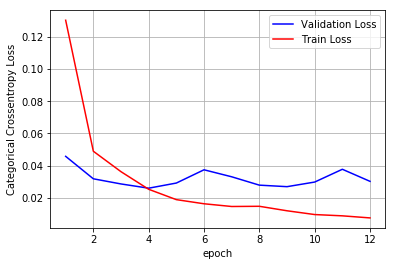

In [0]:
from keras.layers.normalization import BatchNormalization
model = Sequential()
model.add(Conv2D(32, (4, 4), padding="same", activation="relu",input_shape=input_shape))
model.add(Conv2D(64, (4, 4), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

## Architecture 1 with 2 Convolution Layers 4x4 Kernal + Dropouts in Dense Layer and after convolution layers


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 282s 5ms/step - loss: 0.1695 - acc: 0.9489 - val_loss: 0.0380 - val_acc: 0.9877
Epoch 2/12
60000/60000 [==============================] - 283s 5ms/step - loss: 0.0638 - acc: 0.9805 - val_loss: 0.0364 - val_acc: 0.9889
Epoch 3/12
60000/60000 [==============================] - 270s 5ms/step - loss: 0.0507 - acc: 0.9843 - val_loss: 0.0342 - val_acc: 0.9892
Epoch 4/12
60000/60000 [==============================] - 270s 4ms/step - loss: 0.0408 - acc: 0.9877 - val_loss: 0.0281 - val_acc: 0.9906
Epoch 5/12
60000/60000 [==============================] - 265s 4ms/step - loss: 0.0381 - acc: 0.9880 - val_loss: 0.0250 - val_acc: 0.9919
Epoch 6/12
60000/60000 [==============================] - 263s 4ms/step - loss: 0.0330 - acc: 0.9895 - val_loss: 0.0364 - val_acc: 0.9878
Epoch 7/12
60000/60000 [==============================] - 265s 4ms/step - loss: 0.0292 - acc: 0.9902 - val_loss: 0.0337 -

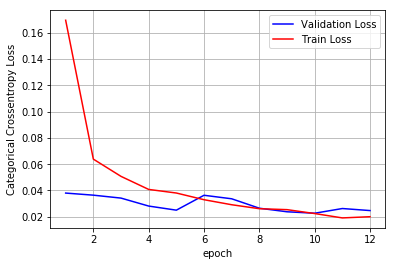

In [0]:
model = Sequential()
model.add(Conv2D(32, (4, 4), padding="same", activation="relu",input_shape=input_shape))
model.add(Conv2D(64, (4, 4), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Architecture", "Kernals", "BatchNormalization", "Dropouts", "Loss", "Accuracy"]

x.add_row(["2 Convolution Layers","4x4","No","No","0.0409","0.9913"])
x.add_row(["2 Convolution Layers","4x4","No","Yes","0.0337","0.9912"])
x.add_row(["2 Convolution Layers","4x4","Yes","Yes","0.0302","0.9908"])
x.add_row(["2 Convolution Layers","4x4","Yes","Yes","0.0247","0.9928"])
print(x)


+----------------------+---------+--------------------+----------+--------+----------+
|     Architecture     | Kernals | BatchNormalization | Dropouts |  Loss  | Accuracy |
+----------------------+---------+--------------------+----------+--------+----------+
| 2 Convolution Layers |   4x4   |         No         |    No    | 0.0409 |  0.9913  |
| 2 Convolution Layers |   4x4   |         No         |   Yes    | 0.0337 |  0.9912  |
| 2 Convolution Layers |   4x4   |        Yes         |   Yes    | 0.0302 |  0.9908  |
| 2 Convolution Layers |   4x4   |        Yes         |   Yes    | 0.0247 |  0.9928  |
+----------------------+---------+--------------------+----------+--------+----------+
